In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import mglearn

C:\Users\tbl008\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\tbl008\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#Import CSV file
data = pd.read_csv (r'australian-crabs.csv', header='infer')

In [4]:
#View raw data
data.head

<bound method NDFrame.head of      1  1.1  1.2   8.1   6.7  16.1    19     7
0    1    1    2   8.8   7.7  18.1  20.8   7.4
1    1    1    3   9.2   7.8  19.0  22.4   7.7
2    1    1    4   9.6   7.9  20.1  23.1   8.2
3    1    1    5   9.8   8.0  20.3  23.0   8.2
4    1    1    6  10.8   9.0  23.0  26.5   9.8
..  ..  ...  ...   ...   ...   ...   ...   ...
194  0    0   46  21.4  18.0  41.2  46.2  18.7
195  0    0   47  21.7  17.1  41.7  47.2  19.6
196  0    0   48  21.9  17.2  42.6  47.4  19.5
197  0    0   49  22.5  17.2  43.0  48.7  19.8
198  0    0   50  23.1  20.2  46.2  52.5  21.1

[199 rows x 8 columns]>

In [5]:
# Give column names
column_names = ['Species', 'Sex', 'Index', 'Frontal Lobe', 'Rear Width', 'Carspace Length', 'Carspace Width', 'Body Depth']

In [6]:
data.columns = column_names

In [7]:
# Display data where in Species: Blue = 1, Orange = 0 & in Sex column: Male = 1 Female = 0

display(data)

,Species,Sex,Index,Frontal Lobe,Rear Width,Carspace Length,Carspace Width,Body Depth
0,1,1,2,8.8,7.7,18.1,20.8,7.4
1,1,1,3,9.2,7.8,19.0,22.4,7.7
2,1,1,4,9.6,7.9,20.1,23.1,8.2
3,1,1,5,9.8,8.0,20.3,23.0,8.2
4,1,1,6,10.8,9.0,23.0,26.5,9.8
...,...,...,...,...,...,...,...,...
194,0,0,46,21.4,18.0,41.2,46.2,18.7
195,0,0,47,21.7,17.1,41.7,47.2,19.6
196,0,0,48,21.9,17.2,42.6,47.4,19.5
197,0,0,49,22.5,17.2,43.0,48.7,19.8


In [8]:
#Extracting the 5 morphological measurements for use in the training set
d5 = data[['Frontal Lobe', 'Rear Width', 'Carspace Length', 'Carspace Width', 'Body Depth']]

In [9]:
#Assign values to X & y for train test split
X = d5.iloc[:, [1, 3, 4]].values
y = d5.iloc[:, [0, 2]].values

In [10]:
# Split data into training and test sets (75% training, 25% test)

X_train, X_test, y_train, y_test = (
train_test_split( 
    X, y, test_size = 0.25, random_state=0))

In [11]:
#Review shape of training data
print(" X_train shape:", X_train.shape) 
print(" y_train shape:", y_train.shape)

 X_train shape: (149, 3)
 y_train shape: (149, 2)


In [12]:
#Perform KMeans clustering assuming 2 clusters
kmeans = KMeans(n_clusters=2).fit(X_train)

In [13]:
#Determine Cluster label for KMeans cluster
kmeans.labels_

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [14]:
# Predict the clusters
labels = kmeans.predict(X_train)

In [15]:
print(labels)

[1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0
 0]


In [16]:
kmeans.cluster_centers_

array([[14.6       , 42.48311688, 16.51298701],
       [10.60833333, 29.4125    , 11.15416667]])

<function matplotlib.pyplot.show(*args, **kw)>

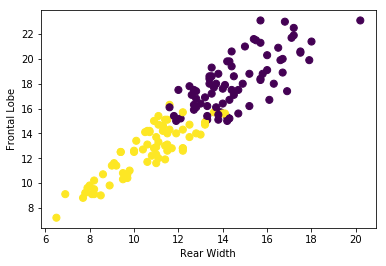

In [17]:
#Plot KMeans Clustering of 2 features 

plt.scatter(X_train[:,0], y_train[:,0], c= kmeans.labels_.astype(float), s=50, alpha=1.0)
plt.ylabel('Frontal Lobe')
plt.xlabel('Rear Width')
plt.show

In [18]:
#Perform agglomerative clustering assuming 2 clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [19]:
#Assign names to cluster array
labels2= cluster.fit_predict(X_train)

Text(0, 0.5, 'Rear Width')

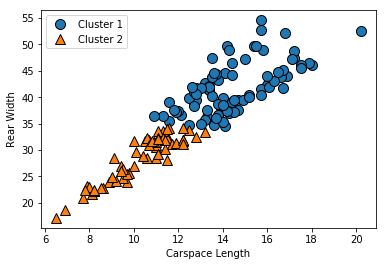

In [20]:
#Graph Agglomerative Clustering using make blobs
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(random_state = 0) 

agg = AgglomerativeClustering(n_clusters = 2) 
assignment = agg.fit_predict(X_train) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment) 

plt.legend(["Cluster 1", "Cluster 2"], loc ="best") 
plt.xlabel("Carspace Length") 
plt.ylabel("Rear Width")

In [21]:
#Compute the Adjusted Rand Index (ARI) score using Species as ground truth for Kmeans

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

metrics.adjusted_rand_score (data['Species'].iloc[:149], kmeans.labels_)

0.02686028585669832

In [22]:
#Compute the Adjusted Rand Index (ARI) score using Species as ground truth 
#for Agglomerative Clustering

metrics.adjusted_rand_score (data['Species'].iloc[:149], labels2)

0.011501899624267667

In [23]:
# The Agglomerative clustering algorithm has a better outcome.
# It is closer to 0 meaning is presents a greater degree of randomness

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(d5)
X_scaled = scaler.transform(d5)

In [25]:
from sklearn.decomposition import PCA

# Applying PCA and keeping two principal components of the data
pca = PCA(n_components=2, random_state=0)

# fit PCA model to training data
pca.fit(X_train)

# transform data onto the first two principal components
X_pca = pca.transform(X_train)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (149, 3)
Reduced shape: (149, 2)


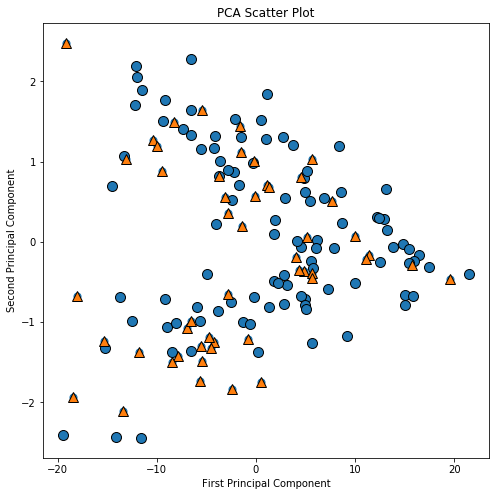

In [62]:
plt.figure(figsize=(8, 8))
colors =['Orange', 'Blue']
for i in range(len(colors)):
 x = X_pca[:, 0] 
 y = X_pca[:, 1]

 x2 = X_pca[:, 0]
 y2 = X_pca[:, 1]
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], data['Species'].iloc[:149])
plt.scatter(x,y,label='First Principal Component',cmap=plt.get_cmap('jet'), marker='o',s=50)
plt.scatter(x2,y2,label='Second Principal Component',cmap=plt.get_cmap('jet'), marker='^',s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()